# DataCamp - Data Scientist with Python

![DataCamp](https://cdn.datacamp.com/main-app/assets/logos/logo-full-filled-white-d3abc0f01268e3c099e91eec99ce5c9403d603ab6bc4c940d2f65f432d4e3be8.svg)

# Statistical Thinking in Python (Part 1)

# Course Description
After all of the hard work of acquiring data and getting them into a form you can work with, you ultimately want to make clear, succinct conclusions from them. This crucial last step of a data analysis pipeline hinges on the principles of statistical inference. In this course, you will start building the foundation you need to think statistically, to speak the language of your data, to understand what they are telling you. The foundations of statistical thinking took decades upon decades to build, but they can be grasped much faster today with the help of computers. With the power of Python-based tools, you will rapidly get up to speed and begin thinking statistically by the end of this course.

In [165]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(42)

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target[[10, 25, 50]]

array([0, 0, 1])

In [41]:
target_names = list(iris.target_names)
target_names

['setosa', 'versicolor', 'virginica']

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
df_iris = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df_iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df_iris['Target'] = iris.target
df_iris.head(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [46]:
df_iris['species'] = df_iris['Target'].map(lambda x: target_names[x])
df_iris.head(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [47]:
df_iris.tail(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target,species
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


# 1. Graphical exploratory data analysis

Look before you leap! A very important proverb, indeed. Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python.

## Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

In [48]:
# petal lengths
setosa_petal_length = df_iris[df_iris['species'] == 'setosa']['Petal Length']
versicolor_petal_length = df_iris[df_iris['species'] == 'versicolor']['Petal Length']
virginica_petal_length = df_iris[df_iris['species'] == 'virginica']['Petal Length']

In [49]:
# petal widths
setosa_petal_width = df_iris[df_iris['species'] == 'setosa']['Petal Width']
versicolor_petal_width = df_iris[df_iris['species'] == 'versicolor']['Petal Width']
virginica_petal_width = df_iris[df_iris['species'] == 'virginica']['Petal Width']

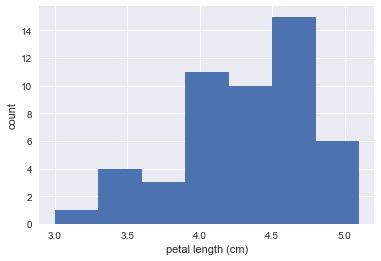

In [50]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Bee swarm plot
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as df.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:

    _ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
    _ = plt.xlabel('state')
    _ = plt.ylabel('percent of vote for Obama')
    plt.show()

In the IPython Shell, you can use sns.swarmplot? or help(sns.swarmplot) for more details on how to make bee swarm plots using seaborn.

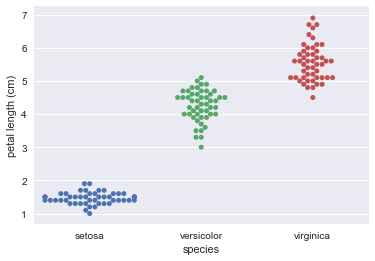

In [51]:
# Create bee swarm plot with Seaborn's default settings
# sns.swarmplot(x='species', y='petal length (cm)', data=df_iris)
sns.swarmplot(x='species', y='Petal Length', data=df_iris)

# Label the axes
_ = plt.ylabel('petal length (cm)')
_ = plt.xlabel('species')

# Show the plot
plt.show()

### Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:

    def foo(a,b):
        #State what function does here
        # Computation performed here
        return x, y

The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. For more on writing your own functions, see DataCamp's course Python Data Science Toolbox (Part 1) here!

In [53]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

### Plotting the ECDF
You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

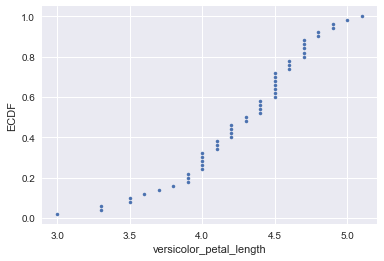

In [54]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle='none')

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('versicolor_petal_length')

# Display the plot
plt.show()

### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().

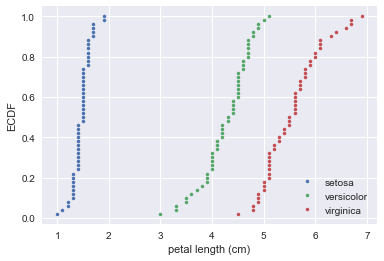

In [55]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# 2. Quantitative exploratory data analysis

In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

## Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [56]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [57]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

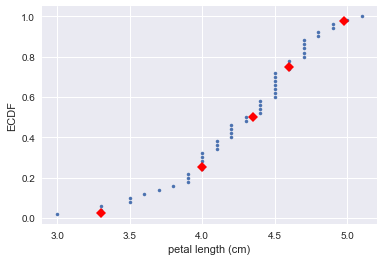

In [58]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')

In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.

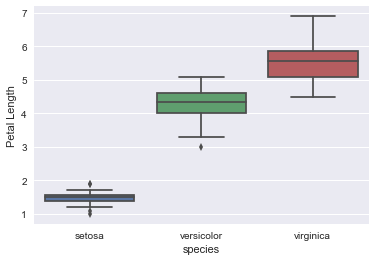

In [59]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='Petal Length', data=df_iris)

# Label the axes
plt.ylabel('Petal Length')
plt.xlabel('species')

# Show the plot
plt.show()

## Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

In [60]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = np.square(differences)

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


## The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

## Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:

    _ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

    _ = plt.xlabel('total votes (thousands)')

    _ = plt.ylabel('percent of vote for Obama')

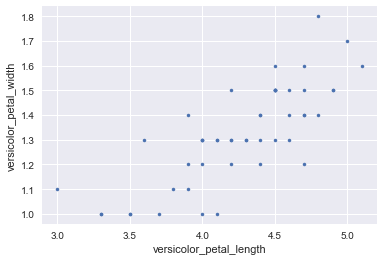

In [61]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.ylabel('versicolor_petal_width')
plt.xlabel('versicolor_petal_length')

# Show the result
plt.show()

## Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

In [62]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

In [63]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# 3. Thinking probabilistically-- Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

## Generating random numbers using the np.random module
We will be hammering the np.random module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, np.random.random() for a test spin. The function returns a random number between zero and one. Call np.random.random() a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument size=4 to np.random.random(). Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.

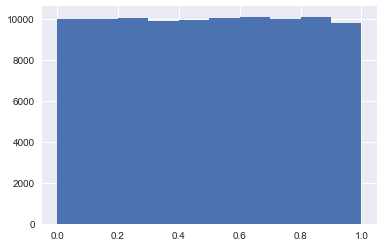

In [64]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


## The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [65]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


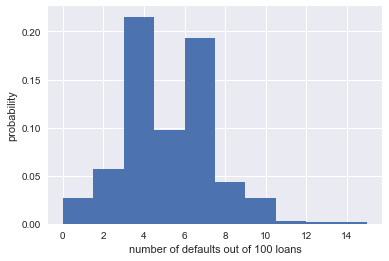

In [66]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

## Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

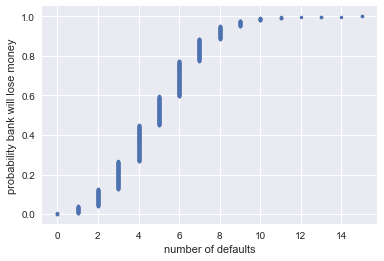

Probability of losing money = 0.022


In [67]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.ylabel('probability bank will lose money')
plt.xlabel('number of defaults')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

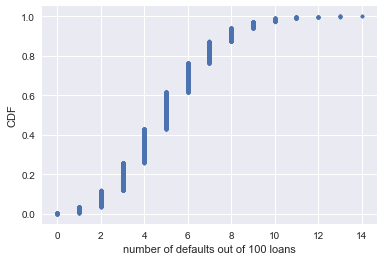

In [68]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.', linestyle='none')
plt.ylabel('CDF')
plt.xlabel('number of defaults out of 100 loans')

# Show the plot
plt.show()


Great work! If you know the story, using built-in algorithms to directly sample out of the distribution is much faster.

## Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


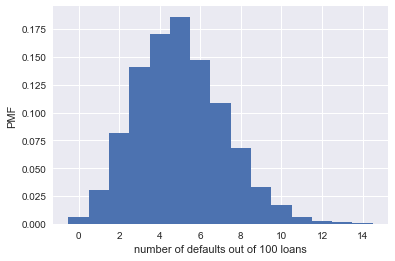

In [69]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Label axes
plt.ylabel('PMF')
plt.xlabel('number of defaults out of 100 loans')

# Show the plot
plt.show()


## Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [70]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

## How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

Answer: Both Binomial and Poisson, though Poisson is easier to model and compute.

Correct! When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

## Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [71]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

# 4. Thinking probabilistically-- Continuous variables

In the last chapter, you learned about probability distributions of discrete variables. Now it is time to move on to continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this last chapter of the course, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course.

## The Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

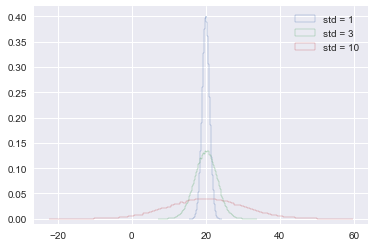

In [72]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


Great work! You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

## The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

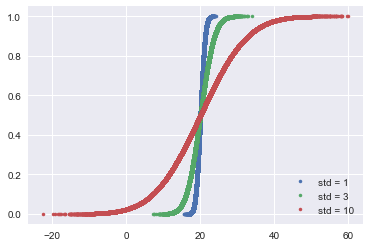

In [73]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


Great work! The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

## Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

https://en.wikipedia.org/wiki/Belmont_Stakes

In [74]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

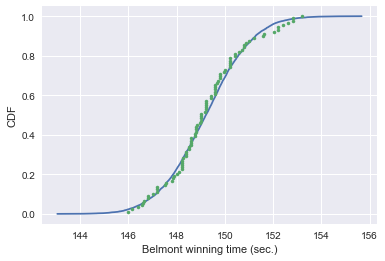

In [75]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

## What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [76]:
# data
mu = 149.22101123595507
sigma = 1.627816471774816

In [77]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples < 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000638


Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## Waiting for the next Secretariat
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

Answer: Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

## If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [78]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

## Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

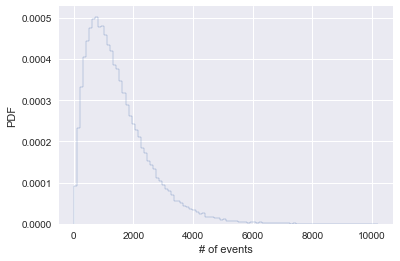

In [79]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')


# Label axes
plt.ylabel('PDF')
plt.xlabel('# of events')

# Show the plot
plt.show()


Great work! Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

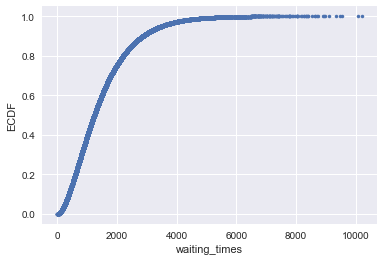

In [80]:
# Compute ECDF for baseball waiting_times data: x_baseball, y_baseball
x_baseball, y_baseball = ecdf(waiting_times)

# Generate plot
plt.plot(x_baseball, y_baseball, marker = '.', linestyle='none')

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('waiting_times')

# Display the plot
plt.show()

Great work! Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

Final thoughts and encouragement toward Statistical Thinking II

# Statistical Thinking in Python (Part 2)

# Course Description
After completing Statistical Thinking in Python (Part 1), you have the probabilistic mindset and foundational hacker stats skills to dive into data sets and extract useful information from them. In this course, you will do just that, expanding and honing your hacker stats toolbox to perform the two key tasks in statistical inference, parameter estimation and hypothesis testing. You will work with real data sets as you learn, culminating with analysis of measurements of the beaks of the Darwin's famous finches. You will emerge from this course with new knowledge and lots of practice under your belt, ready to attack your own inference problems out in the world.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

## How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

In [82]:
# data
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


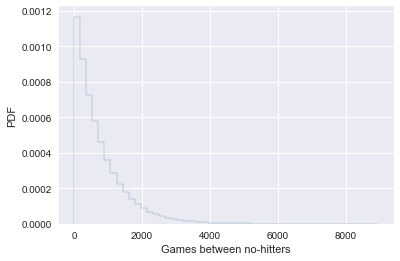

In [83]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


Nice work! We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

## Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the function you created in the previous course to compute the ECDF, as well as the code you wrote to plot it.

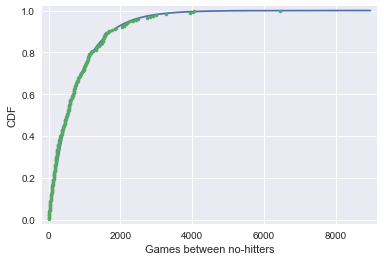

In [84]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## How is this parameter optimal?
Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

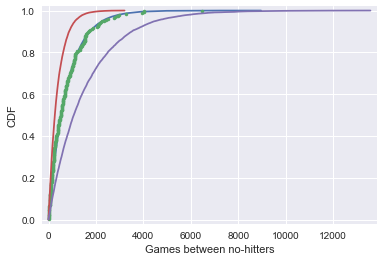

In [85]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Great work! Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

## Linear regression by least squares

## EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

In [86]:
# data
illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

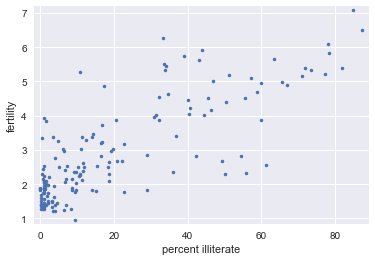

0.8041324026815341


In [87]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

## Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


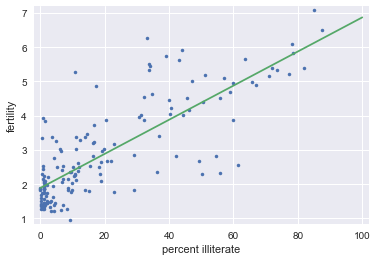

In [88]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


## How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

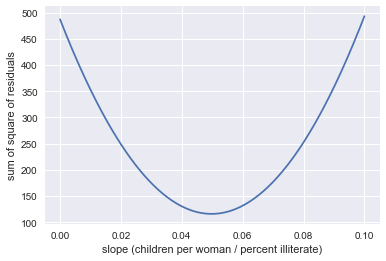

In [89]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


Great work! Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## The importance of EDA: Anscombe's quartet

## Linear regression on appropriate Anscombe data
For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [90]:
# data
x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 10.84,   4.82,   5.68])

0.5000909090909095 3.0000909090909076


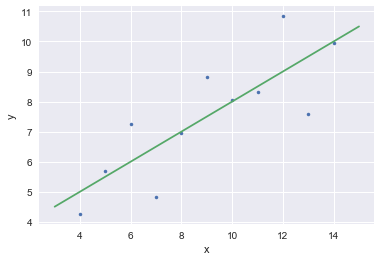

In [91]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Linear regression on all Anscombe data
Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [93]:
# data
anscombe_x = [np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
              np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
              np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
              np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]

anscombe_y = [np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 10.84,   4.82,   5.68]),
              np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13, 7.26,  4.74]),
              np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39, 8.15,   6.42,   5.73]),
              np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 , 5.56,   7.91,   6.89])]

In [94]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


# 2. Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool.

## Generating bootstrap replicates
* Bootsrapping: The use of resampled data to perform statistical inference
* Bootsrap sample: A resampled array of the data
* Bootstrap replicate: A statistic computed from a resampled array

## Getting the terminology down
Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with n repeated measurements, a bootstrap sample is an array of length n that was drawn from the original data with replacement. What is a bootstrap replicate?

Answer: A single value of a statistic computed from a bootstrap sample.

## Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [95]:
# data
rainfall = np. array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

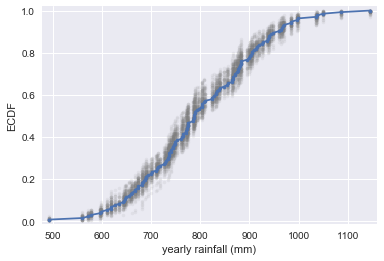

In [96]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Good job! Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Bootstrap confidence intervals
* Confidence Interval of a Statistic: If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval

## Generating many bootstrap replicates
The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

    def bootstrap_replicate_1d(data, func):
        return func(np.random.choice(data, size=len(data)))

In [97]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [98]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


## Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

10.510549150506188
10.358764199574097


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


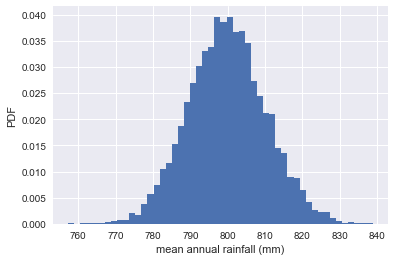

In [99]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Great work! Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

## Confidence intervals of rainfall data
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

Answer: (780, 821) mm/year

    In [2]: np.percentile(bs_replicates, [2.5, 97.5])
    Out[2]: array([ 779.76992481,  820.95043233])

## Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:

    def draw_bs_reps(data, func, size=1):
        return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


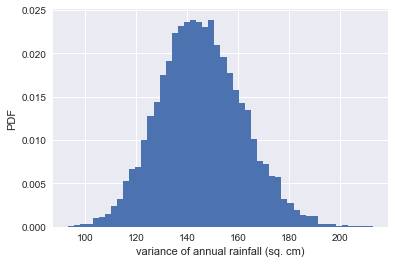

In [100]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


Great work! This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

## Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

In [101]:
# data
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

95% confidence interval = [663.65229084 869.79741036] games


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


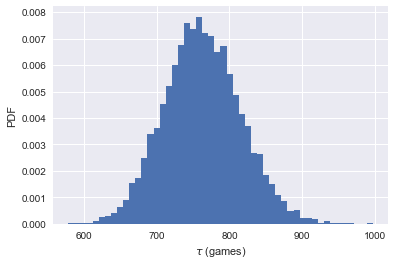

In [102]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## Pairs bootstrap for linear regression
* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of boostrap replicates

## A function to do pairs bootstrap
As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [103]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


## Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

[0.04389859 0.05528877]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


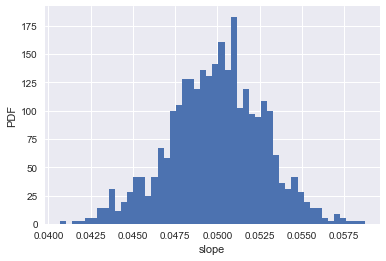

In [104]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

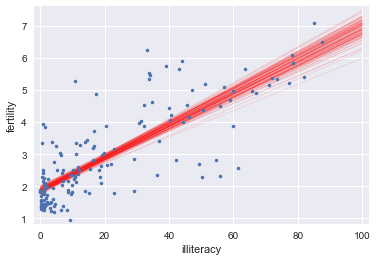

In [105]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

Great work! You now have some serious chops for parameter estimation. Let's move on to hypothesis testing!

# 3. Introduction to hypothesis testing

You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics.

## Formulating and simulating a hypothesis
* Permutation: Random reordering of entries in an array
* Permutation Samples


    import numpy as np
    dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
    dem_share_perm = np.random.permutation(dem_share_both)
    perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
    perm_sample_OH = dem_share_perm[len(dem_share_PA):]

## Generating a permutation sample
In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

In [106]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

## Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_june and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], where 

    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))

In [107]:
# data
rain_june = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

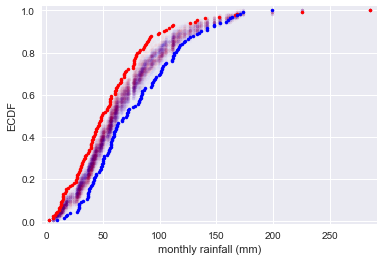

In [108]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
    

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Great work! Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

## Test statistics and p-values
* Hypothesis Testing: Assessment of how reasonable the observed data are assuming a hypothesis is true
* Test Statistic: A single number that can be computed from observed data and from data you simulate under the null hypothesis. It serves as a basis of comparison between the two (what the hypothesis predicts and what we actually observed).
* Permutation Replicate: The value of a test statistic generated from a permutation sample
* P-value: The probability of obtaining a value of your test set statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. NOT the probability that the null hypothsis is true.
* Statistical Significance: Determined by the smallness of a p-value
* Null Hypothesis Significance Testing (NHST): Another name for what we are doing in this chapter.

## Test statistics
When performing hypothesis tests, your choice of test statistic should be:

Answer: be pertinent to the question you are seeking to answer in your hypothesis test.

## What is a p-value?
The p-value is generally a measure of:

Answer: the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

## Generating permutation replicates
As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

In [109]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

## Look before you leap: EDA before hypothesis testing
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

In [124]:
# data
data = np.array([['A', 1.612], 
                 ['A', 0.605],
                 ['A', 0.327],
                 ['A', 0.946],
                 ['A', 0.541],
                 ['A', 1.539],
                 ['A', 0.529],
                 ['A', 0.628],
                 ['A', 1.453],
                 ['A', 0.297],
                 ['A', 0.703],
                 ['A', 0.269],
                 ['A', 0.751],
                 ['A', 0.245],
                 ['A', 1.182],
                 ['A', 0.515],
                 ['A', 0.435],
                 ['A', 0.383],
                 ['A', 0.457],
                 ['A', 0.730],
                 ['B', 0.172],
                 ['B', 0.142],
                 ['B', 0.037],
                 ['B', 0.453],
                 ['B', 0.355],
                 ['B', 0.022],
                 ['B', 0.502],
                 ['B', 0.273],
                 ['B', 0.720],
                 ['B', 0.582],
                 ['B', 0.198],
                 ['B', 0.198],
                 ['B', 0.597],
                 ['B', 0.516],
                 ['B', 0.815],
                 ['B', 0.402],
                 ['B', 0.605],
                 ['B', 0.711],
                 ['B', 0.614],
                 ['B', 0.468]])
df = pd.DataFrame(data, columns=['ID', 'impact_force'])
df.head(2)

,ID,impact_force
0,A,1.612
1,A,0.605


In [125]:
df.tail(2)

,ID,impact_force
38,B,0.614
39,B,0.468


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
ID              40 non-null object
impact_force    40 non-null object
dtypes: object(2)
memory usage: 720.0+ bytes


In [127]:
df['impact_force'] = df['impact_force'].astype(float)

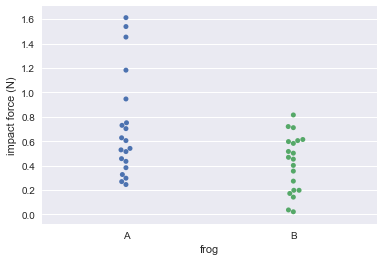

In [128]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

## Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

In [130]:
# data
force_a = np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

force_b = np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [131]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0044


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## Bootstrap hypothesis tests
* Pipeline for hypothesis testing
* Clearly state the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothsis is true
* Compute the test statistic for each simulated data set
* The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real world

## One & Two Sample Tests
* One Sample Tests: Compare one set of data to a single number (can't use permutation testing)
* Two Sample Tests: Compare two sets of data (that require the bootstrap)

## A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [132]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0047


Great work! The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

## A bootstrap test for identical distributions
In the video, we looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is greater than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as force_a and force_b.

In [134]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate([force_a, force_b])

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0066


Great work! You may remember that we got p = 0.0063 from the permutation test, and here we got p = 0.0055. These are very close, and indeed the tests are testing the same thing. However, the permutation test exactly simulates the null hypothesis that the data come from the same distribution, whereas the bootstrap test approximately simulates it. As we will see, though, the bootstrap hypothesis test, while approximate, is more versatile.

## A two-sample bootstrap hypothesis test for difference of means
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

In [163]:
np.random.seed(42)

In [164]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0043


Nice work! Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces?

# 4. Hypothesis test examples

As you saw from the last chapter, hypothesis testing can be a bit tricky. You need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value. Like any skill, practice makes perfect, and this chapter gives you some good practice with hypothesis tests.

## A/B testing